In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pyod.models.ecod import ECOD 
from pyod.models.lunar import LUNAR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [2]:
speech = pd.read_csv(r"C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\speech-unsupervised-ad.csv", header = None)

In [3]:
speech

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,-0.35069,0.52721,-1.62470,-1.334000,-1.03020,1.247500,-0.98067,-1.558700,-0.061233,1.048200,...,0.570960,-1.19840,2.168600,-0.30353,1.21620,-0.607070,0.503820,-0.45571,0.86283,o
1,-0.42537,-0.08818,0.84575,0.881570,1.35690,0.748940,-1.68620,0.461510,0.585700,0.775950,...,-0.582980,-0.35666,-0.638000,0.64106,-0.94488,-1.069700,-0.024029,0.28696,-0.12374,o
2,-1.22100,0.43960,-0.06303,0.709530,0.95079,-0.218740,-1.24850,-1.628600,-1.339700,-1.858500,...,-0.042742,2.77110,1.549400,-1.75680,-0.91595,-0.078469,0.097137,-0.55111,0.69951,o
3,-0.30132,0.55221,0.13769,0.715290,0.99311,-0.169590,-0.93405,-0.948250,-0.750880,0.003107,...,-0.103520,2.53710,2.096000,-1.43680,-1.05230,-0.070276,-0.539810,-1.10380,0.70562,o
4,0.31292,0.42762,0.50348,0.005489,-0.94274,-0.176190,-0.50775,-0.464450,0.694750,0.376040,...,1.060700,1.39660,0.096776,-1.18360,-0.37802,0.357150,1.278600,-0.40139,0.11640,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,-0.73029,0.41857,-0.41746,-0.454210,0.71168,-0.052522,-1.86610,0.220370,0.488910,-2.072700,...,-0.586100,1.47180,0.263640,-0.68870,-1.10260,0.467970,0.481060,-0.29457,0.55751,n
3682,-0.29375,1.46840,-0.28178,-1.411000,-0.91399,1.427700,0.68553,-0.549750,0.025032,0.857950,...,0.575650,0.58935,2.316300,1.00600,-0.15520,-0.343240,-0.023543,-1.57520,-0.37716,n
3683,0.94843,0.35538,-1.04010,0.292630,0.17207,-0.549300,-2.22700,0.111300,0.403860,0.000354,...,0.544540,2.01170,0.584910,-0.43648,-0.11118,0.197870,0.189580,1.04610,-0.30757,n
3684,1.49800,-0.66785,1.04800,-1.569300,-0.65241,1.957500,0.45265,0.807050,0.601570,0.813750,...,-0.453780,-0.29842,-0.641800,0.49518,-2.56460,-0.708690,0.369670,-0.49249,-0.40257,n


In [4]:
shuffled_df = speech.sample(frac=1).reset_index(drop=True)
shuffled_df


df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))



In [5]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))
y

,400
0,0
1,0
2,1
3,0
4,0
...,...
3681,0
3682,0
3683,0
3684,0


In [6]:
ecod = ECOD()
ecod.fit(df)

ECOD(contamination=0.1, n_jobs=1)

In [7]:
ecod_score = ecod.decision_function(df)

In [8]:
ecod_score

array([675.91367587, 768.14545328, 727.67056463, ..., 578.67586929,
       600.06591803, 694.91443333])

In [9]:
ecod_pred = ecod.predict(df)
ecod_pred

array([0, 1, 0, ..., 0, 0, 0])

In [10]:
ecod_acc = accuracy_score(y, ecod_pred)
ecod_acc

0.8871405317417255

0.4697117015262861


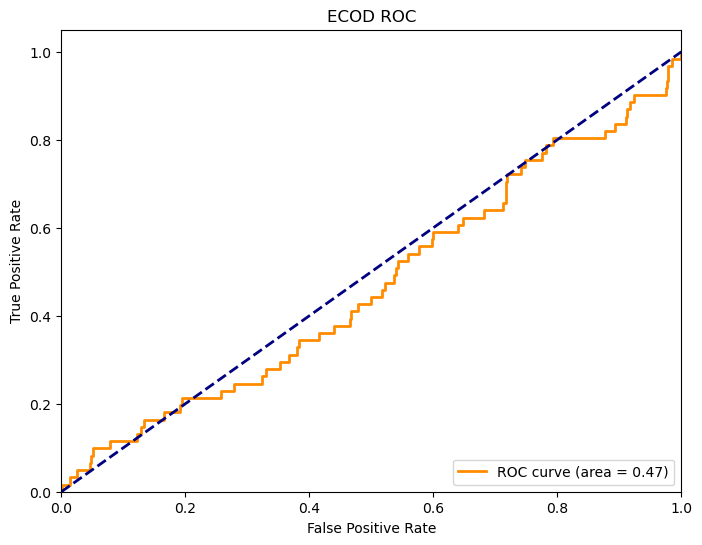

In [11]:
ecod_fpr, ecod_tpr, ecod_thresholds = roc_curve(y, ecod_score)
roc_auc = auc(ecod_fpr, ecod_tpr)
print(roc_auc)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(ecod_fpr, ecod_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ECOD ROC')
plt.legend(loc='lower right')
plt.show()

In [12]:
lunar = LUNAR()
lunar.fit(df)

LUNAR(contamination=0.1, epsilon=0.1, lr=0.001, model_type='WEIGHT',
   n_epochs=200, n_neighbours=5, negative_sampling='MIXED', proportion=1.0,
   scaler=MinMaxScaler(), val_size=0.1, verbose=0, wd=0.1)

In [13]:
lunar_score = lunar.decision_function(df)
lunar_score

array([ 0.13011384,  0.28611207,  0.12407756, ..., -0.33094227,
       -0.07144189, -0.59619665], dtype=float32)

In [14]:
lunar_pred = lunar.predict(df)
lunar_pred

array([0, 1, 0, ..., 0, 0, 0])

In [15]:
lunar_acc = accuracy_score(y,lunar_pred)
lunar_acc

0.887683125339121

0.4790367439231204


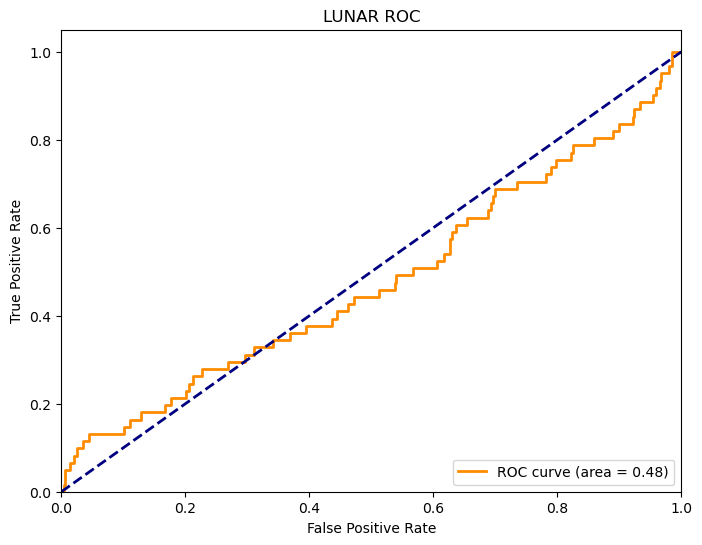

In [16]:
lunar_fpr, lunar_tpr, lunar_thresholds = roc_curve(y, lunar_score)
roc_auc = auc(lunar_fpr, lunar_tpr)
print(roc_auc
      )
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(lunar_fpr, lunar_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LUNAR ROC')
plt.legend(loc='lower right')
plt.show()

In [17]:
y_array = y.values.ravel()

score_df = pd.DataFrame({'lunar_score': lunar_score, 'ecod_score': ecod_score, 'y': y_array})
score_df

,lunar_score,ecod_score,y
0,0.130114,675.913676,0
1,0.286112,768.145453,0
2,0.124078,727.670565,0
3,0.303308,731.123759,0
4,0.103782,693.323313,0
...,...,...,...
3681,-0.216687,566.415780,0
3682,0.163233,672.509020,0
3683,-0.330942,578.675869,0
3684,-0.071442,600.065918,0


In [18]:
x = score_df[['lunar_score', 'ecod_score']]
y = score_df['y']

In [19]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [20]:
y_pred_test = logreg.predict(x_test)

y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9770


In [22]:
print('Training set score: {:.4f}'.format(logreg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(x_test, y_test)))

Training set score: 0.9851
Test set score: 0.9770


In [23]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, x, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {np.mean(cv_scores)}')


Cross-Validation Scores: [0.98238482 0.98371777 0.98371777 0.98371777 0.98371777]
Average Cross-Validation Score: 0.9834511845796884


0.5289994347088751


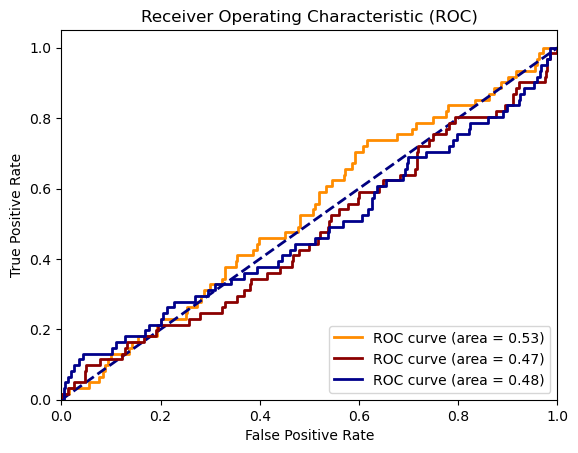

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Get predicted probabilities for the test set
y_prob = logreg.predict_proba(x)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc_ecod = auc(ecod_fpr, ecod_tpr)
roc_auc_lunar = auc(lunar_fpr, lunar_tpr)
# Plot ROC curve
print(roc_auc)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(ecod_fpr, ecod_tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ecod)
plt.plot(lunar_fpr, lunar_tpr, color='darkblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lunar)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [6]:
lunar_accuracies = []
ecod_accuracies = []
ensemble_accuracies = []
lunar_auc = []
ecod_auc = []
ensemble_auc = []

for i in range (10):
  lunar = LUNAR()
  lunar.fit(df)
  lunar_pred = lunar.predict(df)
  lunar_scores = lunar.decision_function(df)
  lunar_scores1 = lunar.decision_scores_
  lunar_acc = accuracy_score(y,lunar_pred)
  lunar_auc_scores = roc_auc_score(y, lunar_scores1)
  ecod = ECOD()
  ecod.fit(df)
  ecod_pred = ecod.predict(df)
  ecod_scores1 = ecod.decision_function(df)
  ecod_scores = ecod.decision_function(df)
  ecod_acc = accuracy_score(y,ecod_pred)
  ecod_auc_scores = roc_auc_score(y, ecod_scores1)

  y_array = y.values.ravel()

  score_df = pd.DataFrame({'lunar_score': lunar_scores, 'ecod_score': ecod_scores, 'y': y_array})
  score_df

  x = score_df[['lunar_score', 'ecod_score']]
  y = score_df['y']
  
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
  logreg = LogisticRegression(solver='liblinear', random_state=0)
  logreg.fit(x_train, y_train)
  y_pred_test = logreg.predict(x_test)
  
  ensemble_acc = accuracy_score(y_test,y_pred_test)
  y_prob = logreg.predict_proba(x)[:, 1]
  fpr, tpr, thresholds = roc_curve(y, y_prob)
  ensemble_auc_scores = auc(fpr, tpr)
  
  lunar_accuracies.append(lunar_acc)
  ecod_accuracies.append(ecod_acc)
  ensemble_accuracies.append(ensemble_acc)
  lunar_auc.append(lunar_auc_scores)
  ecod_auc.append(ecod_auc_scores)
  ensemble_auc.append(ensemble_auc_scores)


avg_lunar_acc = np.mean(lunar_accuracies)
avg_ecod_acc = np.mean(ecod_accuracies)
avg_ensemble_acc = np.mean(ensemble_accuracies)

avg_lunar_auc = np.mean(lunar_auc)
avg_ecod_auc = np.mean(ecod_auc)
avg_ensemble_auc = np.mean(ensemble_auc)


print(avg_lunar_acc,avg_ecod_acc,avg_ensemble_acc)

print(avg_lunar_auc,avg_ecod_auc,avg_ensemble_auc)

  

0.8880086814975584 0.8871405317417255 0.9864498644986451
0.5295968343697004 0.46971170152628605 0.577904352741662
